In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# For inline plotting in Jupyter
%matplotlib inline

print("Libraries imported successfully!")
print(f"Current date: {datetime.now().strftime('%Y-%m-%d')}")

Libraries imported successfully!
Current date: 2026-02-03


In [15]:
#  Define file paths
data_dir = '../data/raw/'
processed_dir = '../data/processed/'

# Main data files
excel_file_path = os.path.join(data_dir, 'ethiopia_fi_unified_data.xlsx')
ref_codes_path = os.path.join(data_dir, 'reference_codes.xlsx')

# Create processed directory if it doesn't exist
os.makedirs(processed_dir, exist_ok=True)

print(" File paths defined:")
print(f"  • Excel data: {excel_file_path}")
print(f"  • Reference codes: {ref_codes_path}")
print(f"  • Processed data: {processed_dir}")

 File paths defined:
  • Excel data: ../data/raw/ethiopia_fi_unified_data.xlsx
  • Reference codes: ../data/raw/reference_codes.xlsx
  • Processed data: ../data/processed/


In [16]:
# Verify files exist
print("Checking if files exist...")

files_to_check = {
    'Main Excel file': excel_file_path,
    'Reference codes': ref_codes_path
}

all_files_exist = True
for file_name, file_path in files_to_check.items():
    if os.path.exists(file_path):
        print(f" {file_name}: FOUND at {file_path}")
        print(f"   Size: {os.path.getsize(file_path) / 1024:.1f} KB")
    else:
        print(f" {file_name}: NOT FOUND at {file_path}")
        all_files_exist = False

if not all_files_exist:
    print("\n Listing files in data/raw directory:")
    for file in os.listdir(data_dir):
        print(f"  - {file}")
else:
    print("\n All required files found!")

Checking if files exist...
 Main Excel file: FOUND at ../data/raw/ethiopia_fi_unified_data.xlsx
   Size: 14.9 KB
 Reference codes: FOUND at ../data/raw/reference_codes.xlsx
   Size: 8.0 KB

 All required files found!


In [17]:
#  Explore Excel file structure
print("EXPLORING EXCEL FILE STRUCTURE")
print("="*50)

# Load Excel file
xls = pd.ExcelFile(excel_file_path)
sheet_names = xls.sheet_names

print(f" File: {os.path.basename(excel_file_path)}")
print(f" Number of sheets: {len(sheet_names)}")
print("\nSheet names:")
for i, sheet in enumerate(sheet_names, 1):
    print(f"  {i}. '{sheet}'")

# Create a summary DataFrame
sheet_info = []
for sheet in sheet_names:
    df_temp = pd.read_excel(excel_file_path, sheet_name=sheet, nrows=5)
    sheet_info.append({
        'sheet_name': sheet,
        'columns': len(df_temp.columns),
        'sample_rows': len(df_temp)
    })

sheet_info_df = pd.DataFrame(sheet_info)
print("\n Sheet information:")
print(sheet_info_df)

EXPLORING EXCEL FILE STRUCTURE
 File: ethiopia_fi_unified_data.xlsx
 Number of sheets: 2

Sheet names:
  1. 'ethiopia_fi_unified_data'
  2. 'Impact_sheet'

 Sheet information:
                 sheet_name  columns  sample_rows
0  ethiopia_fi_unified_data       34            5
1              Impact_sheet       35            5


In [18]:
# Load the main data sheet
print(" LOADING MAIN DATA SHEET")
print("="*50)

# Load the first sheet 
df_main = pd.read_excel(excel_file_path, sheet_name=sheet_names[0])

print(f" Loaded sheet: '{sheet_names[0]}'")
print(f" Shape: {df_main.shape[0]} rows × {df_main.shape[1]} columns")

print("\n First look at the data:")
print(df_main.head(3))

print("\n Data types:")
print(df_main.dtypes.head(10))

 LOADING MAIN DATA SHEET
 Loaded sheet: 'ethiopia_fi_unified_data'
 Shape: 43 rows × 34 columns

 First look at the data:
  record_id  record_type category  pillar               indicator indicator_code indicator_direction  value_numeric value_text  value_type unit observation_date period_start period_end fiscal_year gender  location  region         source_name source_type                                         source_url confidence  related_indicator  relationship_type  impact_direction  impact_magnitude  impact_estimate  lag_months  evidence_basis comparable_country collected_by collection_date  original_text  notes
0  REC_0001  observation      NaN  ACCESS  Account Ownership Rate  ACC_OWNERSHIP       higher_better           22.0        NaN  percentage    %       2014-12-31          NaT        NaT        2014    all  national     NaN  Global Findex 2014      survey  https://www.worldbank.org/en/publication/globa...       high                NaN                NaN               NaN  

In [19]:
# Load the impact sheet
print(" LOADING IMPACT SHEET")
print("="*50)

# Load the second sheet
df_impact = pd.read_excel(excel_file_path, sheet_name=sheet_names[1])

print(f" Loaded sheet: '{sheet_names[1]}'")
print(f" Shape: {df_impact.shape[0]} rows × {df_impact.shape[1]} columns")

print("\n First look at impact data:")
print(df_impact.head(3))

print("\n Impact sheet data types:")
print(df_impact.dtypes.head(10))

 LOADING IMPACT SHEET
 Loaded sheet: 'Impact_sheet'
 Shape: 14 rows × 35 columns

 First look at impact data:
  record_id parent_id  record_type  category  pillar                             indicator  indicator_code  indicator_direction  value_numeric  value_text  value_type   unit observation_date  period_start  period_end  fiscal_year gender  location  region  source_name  source_type  source_url confidence   related_indicator relationship_type impact_direction impact_magnitude  impact_estimate  lag_months evidence_basis comparable_country     collected_by collection_date  original_text                                   notes
0  IMP_0001  EVT_0001  impact_link       NaN  ACCESS  Telebirr effect on Account Ownership             NaN                  NaN           15.0         NaN  percentage      %       2021-05-17           NaN         NaN          NaN    all  national     NaN          NaN          NaN         NaN     medium       ACC_OWNERSHIP            direct         increase     

In [20]:
#  Load reference codes
print(" LOADING REFERENCE CODES")
print("="*50)

if os.path.exists(ref_codes_path):
    df_ref = pd.read_excel(ref_codes_path)
    print(f" Reference codes loaded: {df_ref.shape[0]} rows × {df_ref.shape[1]} columns")
    
    print("\n Reference codes preview:")
    print(df_ref.head())
    
    print("\n Unique fields in reference codes:")
    unique_fields = df_ref['field'].unique()
    for field in unique_fields:
        count = df_ref[df_ref['field'] == field].shape[0]
        print(f"  • {field}: {count} codes")
else:
    print(" Reference codes file not found")
    df_ref = None

 LOADING REFERENCE CODES
 Reference codes loaded: 71 rows × 4 columns

 Reference codes preview:
         field         code                                        description applies_to
0  record_type  observation                Actual measured value from a source        All
1  record_type        event            Policy launch market event or milestone        All
2  record_type  impact_link  Relationship between event and indicator (link...        All
3  record_type       target                     Policy target or official goal        All
4  record_type     baseline                      Starting point for comparison        All

 Unique fields in reference codes:
  • record_type: 6 codes
  • category: 10 codes
  • pillar: 7 codes
  • indicator_direction: 3 codes
  • value_type: 11 codes
  • source_type: 8 codes
  • confidence: 4 codes
  • gender: 3 codes
  • location: 3 codes
  • relationship_type: 4 codes
  • impact_direction: 4 codes
  • impact_magnitude: 4 codes
  • evidence_basis:

In [21]:
# ANALYZE MAIN SHEET STRUCTURE
print(" ANALYZING MAIN SHEET")
print("="*50)

# Display all column names
print(" COLUMN NAMES:")
for i, col in enumerate(df_main.columns, 1):
    print(f"{i:2}. {col}")

# Basic statistics
print(f"\n BASIC STATISTICS:")
print(f"• Total records: {df_main.shape[0]}")
print(f"• Total columns: {df_main.shape[1]}")
print(f"• Memory usage: {df_main.memory_usage(deep=True).sum() / 1024:.1f} KB")

 ANALYZING MAIN SHEET
 COLUMN NAMES:
 1. record_id
 2. record_type
 3. category
 4. pillar
 5. indicator
 6. indicator_code
 7. indicator_direction
 8. value_numeric
 9. value_text
10. value_type
11. unit
12. observation_date
13. period_start
14. period_end
15. fiscal_year
16. gender
17. location
18. region
19. source_name
20. source_type
21. source_url
22. confidence
23. related_indicator
24. relationship_type
25. impact_direction
26. impact_magnitude
27. impact_estimate
28. lag_months
29. evidence_basis
30. comparable_country
31. collected_by
32. collection_date
33. original_text
34. notes

 BASIC STATISTICS:
• Total records: 43
• Total columns: 34
• Memory usage: 51.2 KB


 RECORD TYPE DISTRIBUTION
Count of each record type:
  • observation: 30 records (69.8%)
  • event: 10 records (23.3%)
  • target: 3 records (7.0%)


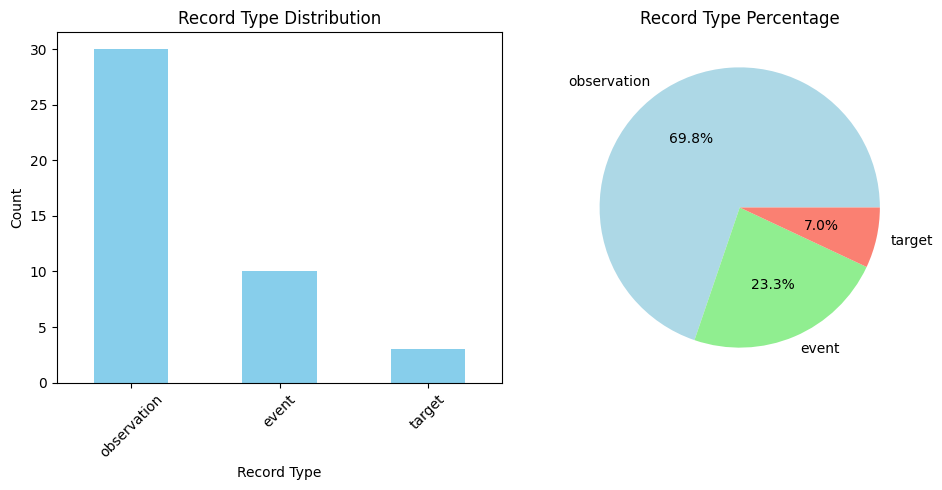

In [22]:
# CHECK RECORD TYPES
print(" RECORD TYPE DISTRIBUTION")
print("="*50)

if 'record_type' in df_main.columns:
    record_counts = df_main['record_type'].value_counts()
    record_percentages = (record_counts / len(df_main) * 100).round(1)
    
    print("Count of each record type:")
    for record_type, count in record_counts.items():
        percentage = record_percentages[record_type]
        print(f"  • {record_type}: {count} records ({percentage}%)")
    
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    record_counts.plot(kind='bar', color='skyblue')
    plt.title('Record Type Distribution')
    plt.xlabel('Record Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.pie(record_counts, labels=record_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
    plt.title('Record Type Percentage')
    plt.tight_layout()
    plt.show()
else:
    print(" 'record_type' column not found in main sheet")

 PILLAR DISTRIBUTION
Pillar distribution:
  • ACCESS: 16 records (37.2%)
  • USAGE: 11 records (25.6%)
  • Missing: 10 records (23.3%)
  • GENDER: 5 records (11.6%)
  • AFFORDABILITY: 1 records (2.3%)


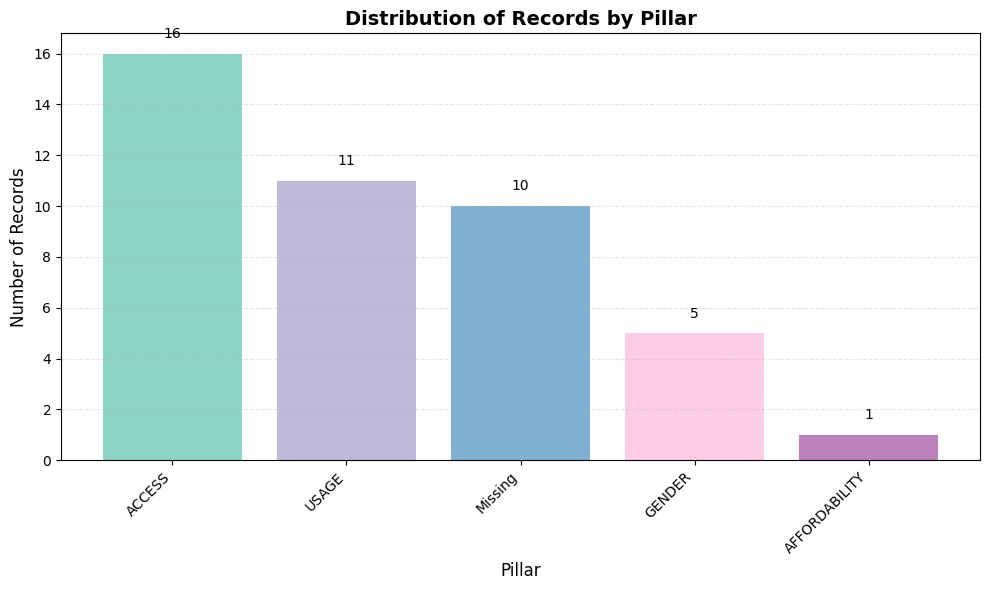


 Pillar Statistics:
  Total records: 43
  Unique pillars: 5

 Top 3 pillars by record count:
  1. ACCESS: 16 records
  2. USAGE: 11 records
  3. Missing: 10 records


In [24]:
# ANALYZE PILLAR DISTRIBUTION
print(" PILLAR DISTRIBUTION")
print("="*50)

if 'pillar' in df_main.columns:
    # Get counts - ensure they're integers
    pillar_counts = df_main['pillar'].value_counts(dropna=False)
    
    print("Pillar distribution:")
    total_records = len(df_main)
    
    for pillar, count in pillar_counts.items():
        pillar_name = 'Missing' if pd.isna(pillar) else pillar
        
        # Convert count to integer first
        count_int = int(count)  
        percentage = (count_int / total_records * 100)
        
        print(f"  • {pillar_name}: {count_int} records ({percentage:.1f}%)")
    
    # Visualize
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(10, 6))
    
    # Handle NaN values for plotting
    pillar_counts_for_plot = pillar_counts.copy()
    if pillar_counts.index.isna().any():
        # Replace NaN with 'Missing' for plotting
        pillar_counts_for_plot.index = pillar_counts_for_plot.index.fillna('Missing')
    
    # Create colors
    colors = plt.cm.Set3(np.arange(len(pillar_counts_for_plot)) / len(pillar_counts_for_plot))
    
    # Create bars
    bars = plt.bar(pillar_counts_for_plot.index, pillar_counts_for_plot.values, color=colors)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Distribution of Records by Pillar', fontsize=14, fontweight='bold')
    plt.xlabel('Pillar', fontsize=12)
    plt.ylabel('Number of Records', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # Additional analysis
    print(f"\n Pillar Statistics:")
    print(f"  Total records: {total_records}")
    print(f"  Unique pillars: {len(pillar_counts)}")
    
    # Show which pillars have the most records
    print(f"\n Top 3 pillars by record count:")
    top_3 = pillar_counts.head(3)
    for i, (pillar, count) in enumerate(top_3.items(), 1):
        pillar_name = 'Missing' if pd.isna(pillar) else pillar
        print(f"  {i}. {pillar_name}: {int(count)} records")
    
else:
    print(" 'pillar' column not found in main sheet")

 INDICATOR CODE ANALYSIS
Total unique indicator codes: 29

Top 10 most frequent indicator codes:
 1. ACC_OWNERSHIP: 7 records
 2. ACC_FAYDA: 4 records
 3. ACC_MM_ACCOUNT: 2 records
 4. ACC_4G_COV: 2 records
 5. USG_P2P_COUNT: 2 records
 6. GEN_MM_SHARE: 2 records
 7. GEN_GAP_ACC: 2 records
 8. ACC_MOBILE_PEN: 1 records
 9. USG_P2P_VALUE: 1 records
10. USG_CROSSOVER: 1 records

 Indicator summary (top 15):
    indicator_code  count  percentage
     ACC_OWNERSHIP      7       16.28
         ACC_FAYDA      4        9.30
    ACC_MM_ACCOUNT      2        4.65
        ACC_4G_COV      2        4.65
     USG_P2P_COUNT      2        4.65
      GEN_MM_SHARE      2        4.65
       GEN_GAP_ACC      2        4.65
    ACC_MOBILE_PEN      1        2.33
     USG_P2P_VALUE      1        2.33
     USG_CROSSOVER      1        2.33
USG_TELEBIRR_USERS      1        2.33
     USG_ATM_COUNT      1        2.33
     USG_ATM_VALUE      1        2.33
   USG_MPESA_USERS      1        2.33
USG_TELEBIRR_VALUE   

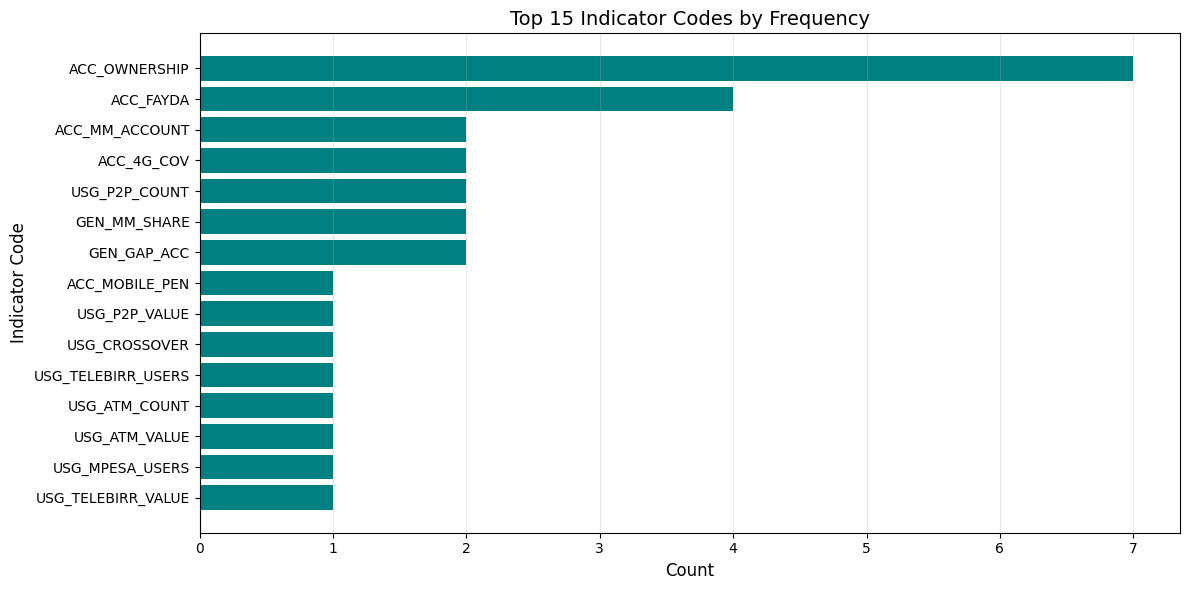

In [25]:
# ANALYZE INDICATOR CODES
print(" INDICATOR CODE ANALYSIS")
print("="*50)

if 'indicator_code' in df_main.columns:
    indicator_counts = df_main['indicator_code'].value_counts()
    
    print(f"Total unique indicator codes: {indicator_counts.shape[0]}")
    print("\nTop 10 most frequent indicator codes:")
    for i, (indicator, count) in enumerate(indicator_counts.head(10).items(), 1):
        print(f"{i:2}. {indicator}: {count} records")
    
    # Create summary table
    indicator_summary = pd.DataFrame({
        'indicator_code': indicator_counts.index,
        'count': indicator_counts.values,
        'percentage': (indicator_counts.values / len(df_main) * 100).round(2)
    }).head(15)
    
    print("\n Indicator summary (top 15):")
    print(indicator_summary.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(12, 6))
    plt.barh(indicator_counts.head(15).index[::-1], indicator_counts.head(15).values[::-1], color='teal')
    plt.title('Top 15 Indicator Codes by Frequency', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Indicator Code', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(" 'indicator_code' column not found in main sheet")

 DATE COLUMNS ANALYSIS
Found 2 date columns:
  • observation_date
  • collection_date

 Date range analysis:

Column: observation_date
  • Valid dates: 43/43 (100.0%)
  • Range: 2014-12-31 to 2030-12-31
  • Unique years: [np.int32(2014), np.int32(2017), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025), np.int32(2028), np.int32(2030)]

Column: collection_date - No valid dates found


C:\Users\DELL\AppData\Local\Temp\ipykernel_16100\59495507.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(df_main[col], errors='coerce')


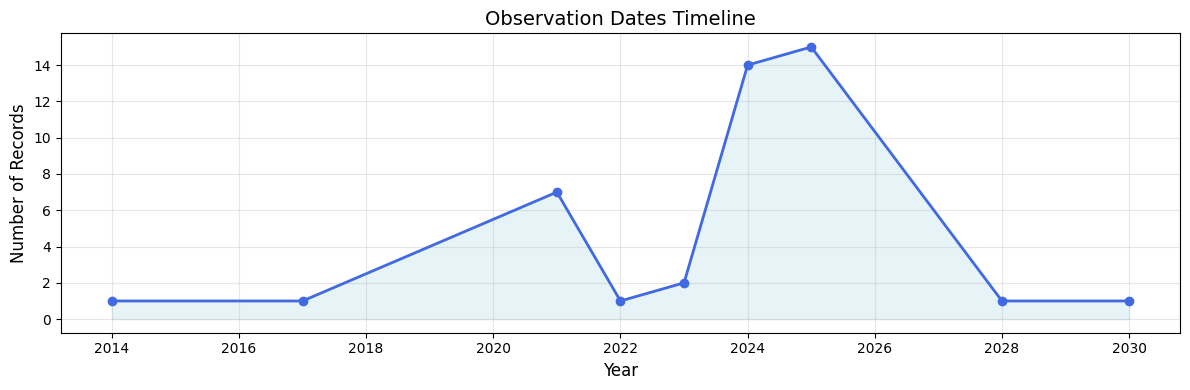

In [26]:
# ANALYZE DATE COLUMNS
print(" DATE COLUMNS ANALYSIS")
print("="*50)

# Find date columns
date_cols = [col for col in df_main.columns if 'date' in col.lower()]
print(f"Found {len(date_cols)} date columns:")
for col in date_cols:
    print(f"  • {col}")

if date_cols:
    print("\n Date range analysis:")
    for col in date_cols:
        # Convert to datetime
        dates = pd.to_datetime(df_main[col], errors='coerce')
        valid_dates = dates.dropna()
        
        if len(valid_dates) > 0:
            print(f"\nColumn: {col}")
            print(f"  • Valid dates: {len(valid_dates)}/{len(df_main)} ({(len(valid_dates)/len(df_main)*100):.1f}%)")
            print(f"  • Range: {valid_dates.min().strftime('%Y-%m-%d')} to {valid_dates.max().strftime('%Y-%m-%d')}")
            print(f"  • Unique years: {sorted(valid_dates.dt.year.unique())}")
        else:
            print(f"\nColumn: {col} - No valid dates found")
    
    # Plot timeline for observation_date if it exists
    if 'observation_date' in df_main.columns:
        obs_dates = pd.to_datetime(df_main['observation_date'], errors='coerce').dropna()
        if len(obs_dates) > 0:
            plt.figure(figsize=(12, 4))
            yearly_counts = obs_dates.dt.year.value_counts().sort_index()
            plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='royalblue', linewidth=2)
            plt.fill_between(yearly_counts.index, 0, yearly_counts.values, alpha=0.3, color='lightblue')
            plt.title('Observation Dates Timeline', fontsize=14)
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Number of Records', fontsize=12)
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
else:
    print(" No date columns found")

 MISSING VALUES ANALYSIS
Columns with missing values:
                     missing_count  missing_percent
lag_months                      43           100.00
region                          43           100.00
impact_estimate                 43           100.00
relationship_type               43           100.00
evidence_basis                  43           100.00
notes                           43           100.00
related_indicator               43           100.00
impact_magnitude                43           100.00
impact_direction                43           100.00
category                        33            76.74
period_start                    33            76.74
collection_date                 33            76.74
period_end                      33            76.74
value_text                      33            76.74
source_url                      12            27.91
indicator_direction             10            23.26
pillar                          10            23.26
value_nume

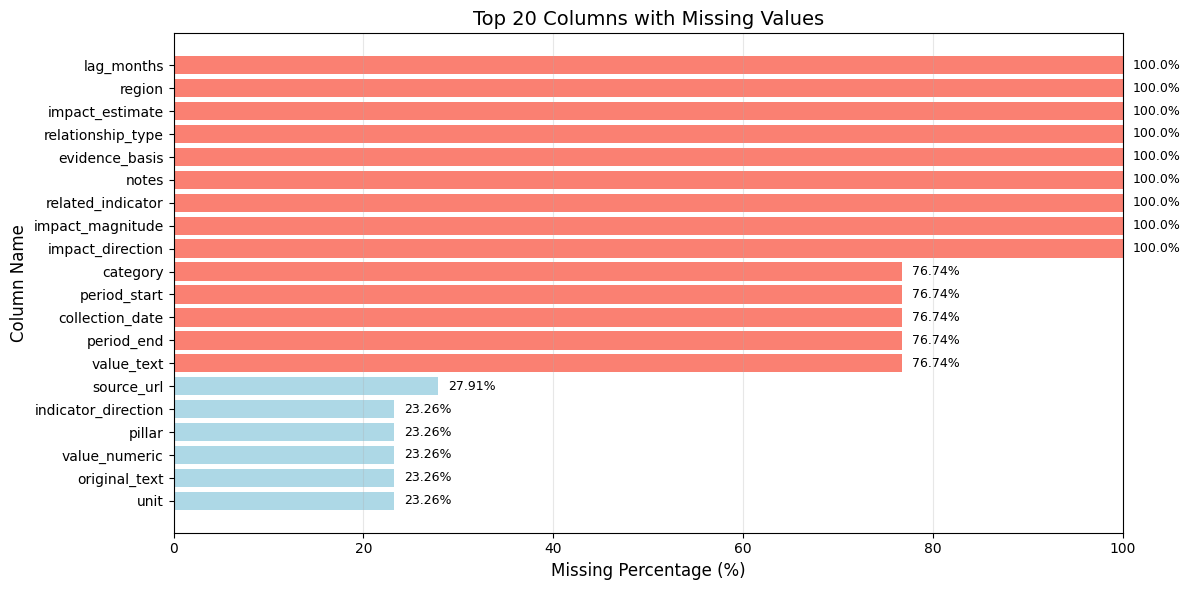

In [27]:
# MISSING VALUES ANALYSIS
print(" MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values
missing_counts = df_main.isnull().sum()
missing_percent = (missing_counts / len(df_main) * 100).round(2)

# Create summary DataFrame
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
}).sort_values('missing_percent', ascending=False)

print("Columns with missing values:")
print(missing_df[missing_df['missing_count'] > 0].head(20).to_string())

# Summary statistics
total_missing_cells = missing_counts.sum()
total_cells = df_main.shape[0] * df_main.shape[1]
overall_missing_percent = (total_missing_cells / total_cells * 100).round(2)

print(f"\n SUMMARY:")
print(f"• Total cells: {total_cells:,}")
print(f"• Missing cells: {total_missing_cells:,}")
print(f"• Overall missing: {overall_missing_percent}%")

# Visualize top 20 columns with most missing values
missing_top20 = missing_df.head(20)
plt.figure(figsize=(12, 6))
bars = plt.barh(missing_top20.index[::-1], missing_top20['missing_percent'][::-1], 
                color=np.where(missing_top20['missing_percent'][::-1] > 50, 'salmon', 'lightblue'))
plt.title('Top 20 Columns with Missing Values', fontsize=14)
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Column Name', fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, percent) in enumerate(zip(bars, missing_top20['missing_percent'][::-1])):
    plt.text(percent + 1, bar.get_y() + bar.get_height()/2, 
             f'{percent}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

NUMERIC VALUES ANALYSIS
Total numeric values: 33
Missing numeric values: 10 (23.3%)

 Descriptive statistics:
  • Mean: 94372576990.69
  • Median: 61.40
  • Std: 423106092501.17
  • Min: 1.08
  • Max: 2380000000000.00
  • Range: 2379999999998.92


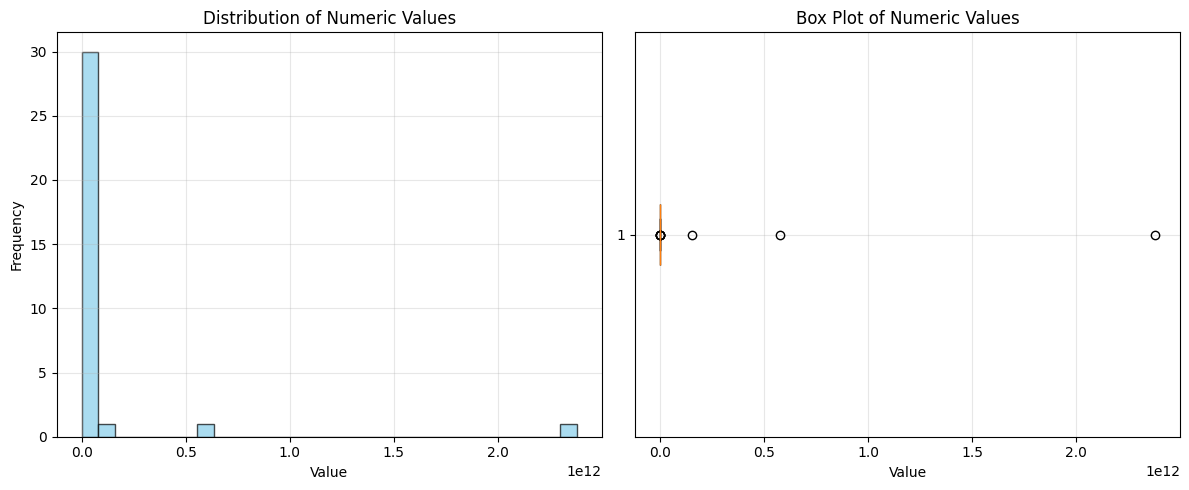


 Numeric values by record type:
  • observation: 30 values, mean: 103806834685.76
  • target: 3 values, mean: 30000040.00


In [28]:
# NUMERIC VALUES ANALYSIS
print("NUMERIC VALUES ANALYSIS")
print("="*50)

if 'value_numeric' in df_main.columns:
    numeric_values = df_main['value_numeric'].dropna()
    
    print(f"Total numeric values: {len(numeric_values)}")
    print(f"Missing numeric values: {df_main['value_numeric'].isnull().sum()} ({(df_main['value_numeric'].isnull().sum()/len(df_main)*100):.1f}%)")
    
    if len(numeric_values) > 0:
        print("\n Descriptive statistics:")
        print(f"  • Mean: {numeric_values.mean():.2f}")
        print(f"  • Median: {numeric_values.median():.2f}")
        print(f"  • Std: {numeric_values.std():.2f}")
        print(f"  • Min: {numeric_values.min():.2f}")
        print(f"  • Max: {numeric_values.max():.2f}")
        print(f"  • Range: {numeric_values.max() - numeric_values.min():.2f}")
        
        # Create histogram
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(numeric_values, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        plt.title('Distribution of Numeric Values', fontsize=12)
        plt.xlabel('Value', fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.grid(alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.boxplot(numeric_values, vert=False, patch_artist=True, 
                   boxprops=dict(facecolor='lightgreen'))
        plt.title('Box Plot of Numeric Values', fontsize=12)
        plt.xlabel('Value', fontsize=10)
        plt.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Show by record type if available
        if 'record_type' in df_main.columns:
            print("\n Numeric values by record type:")
            for record_type in df_main['record_type'].unique():
                if pd.notna(record_type):
                    type_values = df_main[df_main['record_type'] == record_type]['value_numeric'].dropna()
                    if len(type_values) > 0:
                        print(f"  • {record_type}: {len(type_values)} values, mean: {type_values.mean():.2f}")
else:
    print(" 'value_numeric' column not found")

 SOURCE INFORMATION ANALYSIS
 Available source columns:
  • source_name: 25 unique values, 0 missing
  • source_type: 7 unique values, 0 missing
  • confidence: 2 unique values, 0 missing

----------------------------------------
 Top 10 Data Sources:
   1. Global Findex 2021: 5 records
   2. EthSwitch Annual Report: 5 records
   3. Global Findex 2024: 3 records
   4. NBE: 3 records
   5. Ethio Telecom LEAD Report: 2 records
   6. Calculated: 2 records
   7. Ethio Telecom Report: 2 records
   8. EthSwitch: 2 records
   9. News: 2 records
  10. Safaricom Results: 2 records

----------------------------------------
Source Types:
  • operator: 15 records (34.9%)
  • survey: 10 records (23.3%)
  • regulator: 7 records (16.3%)
  • research: 4 records (9.3%)
  • policy: 3 records (7.0%)
  • calculated: 2 records (4.7%)
  • news: 2 records (4.7%)

----------------------------------------
Confidence Levels Distribution:
  • high: 40 records (93.0%)
  • medium: 3 records (7.0%)


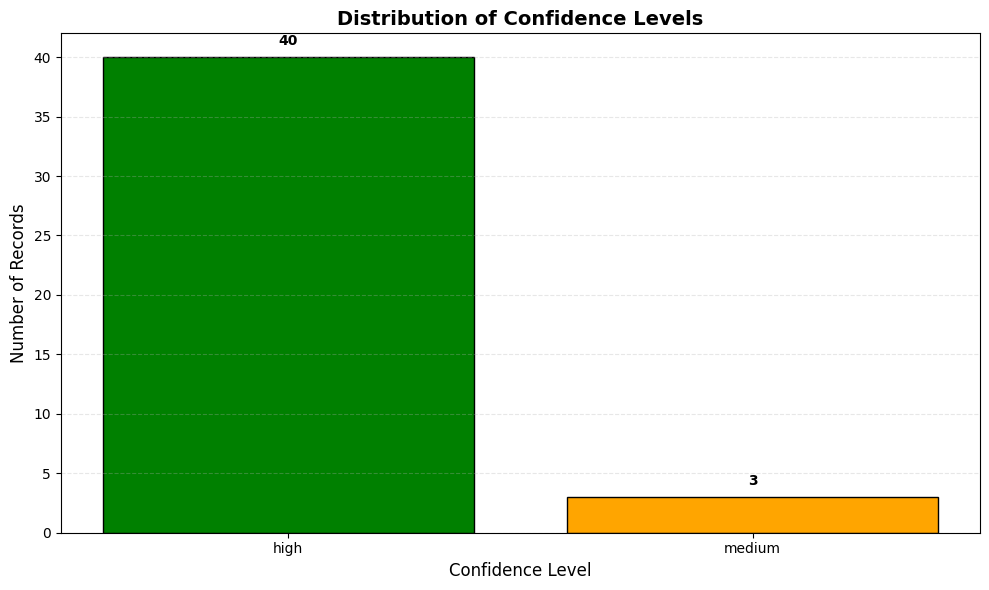

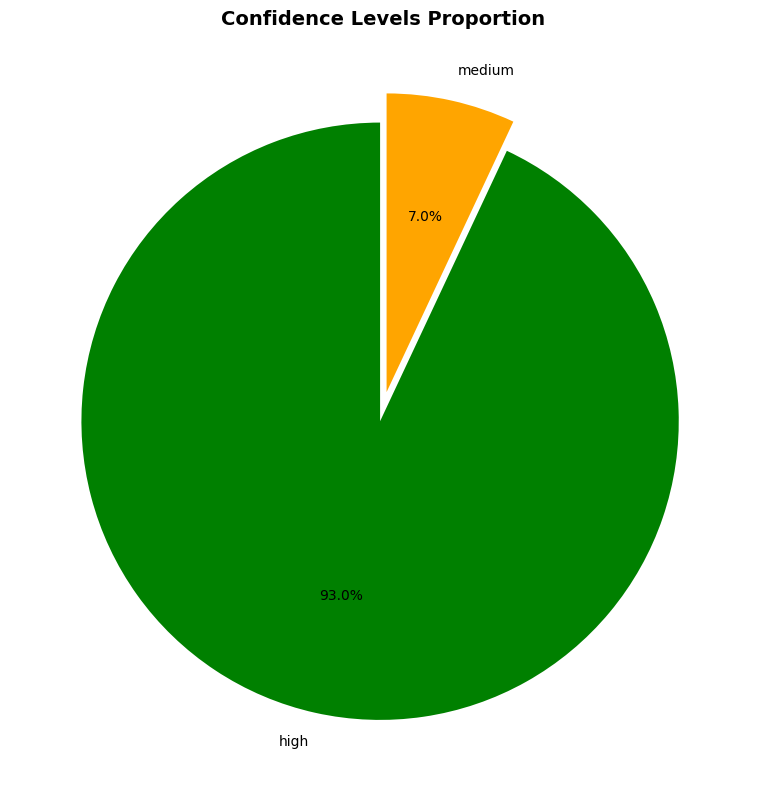

In [33]:
# SOURCE INFORMATION ANALYSIS

print(" SOURCE INFORMATION ANALYSIS")
print("="*50)

source_columns = ['source_name', 'source_type', 'confidence']
available_source_cols = [col for col in source_columns if col in df_main.columns]

if available_source_cols:
    print(" Available source columns:")
    for col in available_source_cols:
        unique_count = df_main[col].nunique(dropna=True)
        missing_count = df_main[col].isnull().sum()
        print(f"  • {col}: {unique_count} unique values, {missing_count} missing")
    
    print("\n" + "-"*40)
    
    # Analyze source_name if available
    if 'source_name' in df_main.columns:
        print(" Top 10 Data Sources:")
        top_sources = df_main['source_name'].value_counts().head(10)
        for i, (source, count) in enumerate(top_sources.items(), 1):
            print(f"  {i:2}. {source}: {count} records")
    
    print("\n" + "-"*40)
    
    # Analyze source_type if available
    if 'source_type' in df_main.columns:
        print("Source Types:")
        source_types = df_main['source_type'].value_counts()
        for source_type, count in source_types.items():
            percentage = (count / len(df_main) * 100)
            print(f"  • {source_type}: {count} records ({percentage:.1f}%)")
    
    print("\n" + "-"*40)
    
    # Analyze confidence levels if available (FIXED VERSION)
    if 'confidence' in df_main.columns:
        print("Confidence Levels Distribution:")
        
        # Get counts - ensure proper handling
        conf_counts = df_main['confidence'].value_counts(dropna=False)
        total_records = len(df_main)
        
        for conf, count in conf_counts.items():
            # Handle NaN confidence values
            if pd.isna(conf):
                conf_name = 'Missing'
            else:
                conf_name = str(conf)
            
            # Convert count to integer safely
            try:
                count_int = int(count)
            except:
                count_int = count  # Keep as is if conversion fails
            
            # Calculate percentage safely
            try:
                percentage = (count_int / total_records * 100)
                print(f"  • {conf_name}: {count_int} records ({percentage:.1f}%)")
            except:
                print(f"  • {conf_name}: {count} records (percentage calculation failed)")
        
        # Visualize confidence levels
        if len(conf_counts) > 1:
            import matplotlib.pyplot as plt
            import numpy as np
            
            plt.figure(figsize=(10, 6))
            
            # Prepare data for plotting
            plot_labels = []
            plot_values = []
            plot_colors = []
            
            for conf, count in conf_counts.items():
                if pd.isna(conf):
                    label = 'Missing'
                    color = 'gray'
                else:
                    label = str(conf)
                    # Assign colors based on confidence level
                    if 'high' in label.lower():
                        color = 'green'
                    elif 'medium' in label.lower():
                        color = 'orange'
                    elif 'low' in label.lower():
                        color = 'red'
                    else:
                        color = 'blue'
                
                plot_labels.append(label)
                # Convert count to int for plotting
                try:
                    plot_values.append(int(count))
                except:
                    plot_values.append(count)
                plot_colors.append(color)
            
            # Create bar chart
            bars = plt.bar(plot_labels, plot_values, color=plot_colors, edgecolor='black')
            
            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + max(plot_values)*0.02,
                        f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
            
            plt.title('Distribution of Confidence Levels', fontsize=14, fontweight='bold')
            plt.xlabel('Confidence Level', fontsize=12)
            plt.ylabel('Number of Records', fontsize=12)
            plt.grid(axis='y', alpha=0.3, linestyle='--')
            plt.tight_layout()
            plt.show()
            
            # Also create a pie chart for better visualization
            plt.figure(figsize=(8, 8))
            
            # Only show pie if we have reasonable distribution
            if len(plot_values) <= 5:
                plt.pie(plot_values, labels=plot_labels, colors=plot_colors,
                       autopct='%1.1f%%', startangle=90, explode=[0.05]*len(plot_labels))
                plt.title('Confidence Levels Proportion', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.show()
            else:
                print("\n  Too many categories for pie chart, showing bar chart only")
else:
    print(" No source information columns found")

In [34]:
# IMPACT SHEET ANALYSIS
print("IMPACT SHEET DETAILED ANALYSIS")
print("="*50)

print(f"Impact sheet shape: {df_impact.shape}")
print(f"Columns: {df_impact.shape[1]}")
print(f"Rows: {df_impact.shape[0]}")

print("\n First 3 rows:")
print(df_impact.head(3))

print("\n Impact sheet columns:")
for i, col in enumerate(df_impact.columns, 1):
    print(f"{i:2}. {col}")

# Check record_type in impact sheet
if 'record_type' in df_impact.columns:
    print(f"\n Record types in impact sheet:")
    print(df_impact['record_type'].value_counts())

# Check parent_id (links to events)
if 'parent_id' in df_impact.columns:
    print(f"\n Unique parent events: {df_impact['parent_id'].nunique()}")
    print("Top linked events:")
    print(df_impact['parent_id'].value_counts().head())

# Check impact direction and magnitude
impact_cols = ['impact_direction', 'impact_magnitude', 'impact_estimate']
for col in impact_cols:
    if col in df_impact.columns:
        unique_vals = df_impact[col].dropna().unique()
        print(f"\n {col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Show if not too many
            print(f"  Values: {list(unique_vals)}")

IMPACT SHEET DETAILED ANALYSIS
Impact sheet shape: (14, 35)
Columns: 35
Rows: 14

 First 3 rows:
  record_id parent_id  record_type  category  pillar                             indicator  indicator_code  indicator_direction  value_numeric  value_text  value_type   unit observation_date  period_start  period_end  fiscal_year gender  location  region  source_name  source_type  source_url confidence   related_indicator relationship_type impact_direction impact_magnitude  impact_estimate  lag_months evidence_basis comparable_country     collected_by collection_date  original_text                                   notes
0  IMP_0001  EVT_0001  impact_link       NaN  ACCESS  Telebirr effect on Account Ownership             NaN                  NaN           15.0         NaN  percentage      %       2021-05-17           NaN         NaN          NaN    all  national     NaN          NaN          NaN         NaN     medium       ACC_OWNERSHIP            direct         increase             high 

In [37]:
# DATA QUALITY ASSESSMENT
print("DATA QUALITY ASSESSMENT")
print("="*50)

quality_issues = []

# 1. Check for duplicate records
duplicate_count = df_main.duplicated().sum()
if duplicate_count > 0:
    quality_issues.append(f" Found {duplicate_count} duplicate records")
else:
    quality_issues.append(" No duplicate records found")

# 2. Check record_id uniqueness
if 'record_id' in df_main.columns:
    unique_ids = df_main['record_id'].nunique()
    if unique_ids == len(df_main):
        quality_issues.append(" All record_ids are unique")
    else:
        quality_issues.append(f" Only {unique_ids} unique record_ids out of {len(df_main)} records")

# 3. Check for invalid dates
if 'observation_date' in df_main.columns:
    invalid_dates = df_main['observation_date'].isnull().sum()
    if invalid_dates > 0:
        quality_issues.append(f" {invalid_dates} records have missing observation dates")
    else:
        quality_issues.append("All records have observation dates")

# 4. Check consistency between record_type and other columns
if 'record_type' in df_main.columns:
    # Observations should have value_numeric
    obs_missing_values = df_main[(df_main['record_type'] == 'observation') & 
                                 (df_main['value_numeric'].isnull())].shape[0]
    if obs_missing_values > 0:
        quality_issues.append(f" {obs_missing_values} observations missing numeric values")
    
    # Events should not have pillars
    events_with_pillar = df_main[(df_main['record_type'] == 'event') & 
                                 (df_main['pillar'].notna())].shape[0]
    if events_with_pillar > 0:
        quality_issues.append(f" {events_with_pillar} events have pillar values (should be empty)")

# 5. Check reference code compliance
if df_ref is not None and 'record_type' in df_main.columns:
    valid_record_types = df_ref[df_ref['field'] == 'record_type']['code'].tolist()
    invalid_record_types = set(df_main['record_type'].unique()) - set(valid_record_types)
    if invalid_record_types:
        quality_issues.append(f" Invalid record types found: {invalid_record_types}")
    else:
        quality_issues.append(" All record types are valid according to reference codes")

print("\n".join(quality_issues))

# Create quality score
quality_score = len([i for i in quality_issues if i.startswith(" ")]) / len(quality_issues) * 100
print(f"\n Data Quality Score: {quality_score:.1f}%")

DATA QUALITY ASSESSMENT
 No duplicate records found
 All record_ids are unique
All records have observation dates
 All record types are valid according to reference codes

 Data Quality Score: 75.0%


In [38]:
# IDENTIFY DATA GAPS
print("IDENTIFYING DATA GAPS")
print("="*50)

data_gaps = []

# 1. Time series gaps
if 'observation_date' in df_main.columns and 'indicator_code' in df_main.columns:
    # Get observations only
    observations = df_main[df_main['record_type'] == 'observation']
    
    if len(observations) > 0:
        # Get unique years
        obs_dates = pd.to_datetime(observations['observation_date'], errors='coerce')
        unique_years = sorted(obs_dates.dt.year.dropna().unique())
        
        print(f" Years with data: {unique_years}")
        
        # Check for gaps
        full_year_range = range(int(min(unique_years)), int(max(unique_years)) + 1)
        missing_years = [year for year in full_year_range if year not in unique_years]
        
        if missing_years:
            data_gaps.append(f" Missing years in time series: {missing_years}")
        else:
            data_gaps.append("Time series has continuous year coverage")

# 2. Indicator coverage gaps
if 'indicator_code' in df_main.columns:
    observations = df_main[df_main['record_type'] == 'observation']
    indicator_coverage = observations['indicator_code'].value_counts()
    
    print(f"\n Indicator coverage (observations only):")
    print(f"Total unique indicators: {indicator_coverage.shape[0]}")
    print(f"Indicators with only 1 data point: {(indicator_coverage == 1).sum()}")
    print(f"Indicators with 2+ data points: {(indicator_coverage >= 2).sum()}")
    
    # Identify sparse indicators
    sparse_indicators = indicator_coverage[indicator_coverage == 1].index.tolist()
    if sparse_indicators:
        data_gaps.append(f" Sparse indicators (only 1 data point): {len(sparse_indicators)} indicators")

# 3. Pillar coverage
if 'pillar' in df_main.columns:
    pillar_coverage = df_main[df_main['record_type'] == 'observation']['pillar'].value_counts()
    print(f"\n Observations by pillar:")
    for pillar, count in pillar_coverage.items():
        print(f"  • {pillar}: {count} observations")

# 4. Demographic gaps
demographic_cols = ['gender', 'location', 'region']
available_demo_cols = [col for col in demographic_cols if col in df_main.columns]

if available_demo_cols:
    print(f"\n Demographic coverage:")
    for col in available_demo_cols:
        unique_vals = df_main[col].dropna().unique()
        missing_pct = (df_main[col].isnull().sum() / len(df_main) * 100).round(1)
        print(f"  • {col}: {len(unique_vals)} unique values, {missing_pct}% missing")
        
        if missing_pct > 50:
            data_gaps.append(f" Limited {col} data: {missing_pct}% missing")

print(f"\n Total data gaps identified: {len(data_gaps)}")
if data_gaps:
    print("\n".join(data_gaps))

IDENTIFYING DATA GAPS
 Years with data: [np.int32(2014), np.int32(2017), np.int32(2021), np.int32(2023), np.int32(2024), np.int32(2025)]

 Indicator coverage (observations only):
Total unique indicators: 19
Indicators with only 1 data point: 13
Indicators with 2+ data points: 6

 Observations by pillar:
  • ACCESS: 14 observations
  • USAGE: 11 observations
  • GENDER: 4 observations
  • AFFORDABILITY: 1 observations

 Demographic coverage:
  • gender: 3 unique values, 0.0% missing
  • location: 1 unique values, 0.0% missing
  • region: 0 unique values, 100.0% missing

 Total data gaps identified: 3
 Missing years in time series: [2015, 2016, 2018, 2019, 2020, 2022]
 Sparse indicators (only 1 data point): 13 indicators
 Limited region data: 100.0% missing


In [39]:
# PREPARE FOR DATA ENRICHMENT
print("PREPARING FOR DATA ENRICHMENT")
print("="*50)

print("Based on the analysis, these need to be added:")
print("1. More recent data points (2024-2025)")
print("2. Additional indicators for better forecasting")
print("3. More demographic breakdowns")
print("4. Additional events and their impacts")

# Define what will be added
new_data_plan = {
    'observations': [
        {
            'indicator': 'Digital Payment Adoption',
            'code': 'USG_DIGITAL_PAYMENT',
            'year': 2024,
            'value': 35.0,
            'source': 'Challenge Document'
        },
        {
            'indicator': 'Mobile Money Users',
            'code': 'ACC_MM_ACCOUNT',
            'year': 2025,
            'value': 60.0,
            'source': 'GSMA Estimate'
        }
    ],
    'events': [
        {
            'name': 'NFIS-III Launch',
            'date': '2026-07-01',
            'category': 'policy',
            'description': 'Third National Financial Inclusion Strategy'
        }
    ],
    'impact_links': [
        {
            'parent_event': 'M-Pesa Entry',
            'indicator': 'ACC_MM_ACCOUNT',
            'impact': '+10M users',
            'lag': '12 months'
        }
    ]
}

print("\n Planned additions:")
for data_type, items in new_data_plan.items():
    print(f"\n{data_type.upper()}:")
    for item in items:
        if data_type == 'observations':
            print(f"  • {item['indicator']} ({item['year']}): {item['value']}")
        elif data_type == 'events':
            print(f"  • {item['name']} ({item['date']})")
        elif data_type == 'impact_links':
            print(f"  • {item['parent_event']} → {item['indicator']}: {item['impact']}")

PREPARING FOR DATA ENRICHMENT
Based on the analysis, these need to be added:
1. More recent data points (2024-2025)
2. Additional indicators for better forecasting
3. More demographic breakdowns
4. Additional events and their impacts

 Planned additions:

OBSERVATIONS:
  • Digital Payment Adoption (2024): 35.0
  • Mobile Money Users (2025): 60.0

EVENTS:
  • NFIS-III Launch (2026-07-01)

IMPACT_LINKS:
  • M-Pesa Entry → ACC_MM_ACCOUNT: +10M users


In [40]:
# ADD NEW OBSERVATIONS
print("ADDING NEW OBSERVATIONS")
print("="*50)

# Template for new observation
def create_new_observation(record_id, indicator, indicator_code, value, year, source, confidence='medium'):
    return {
        'record_id': record_id,
        'record_type': 'observation',
        'category': None,
        'pillar': 'USAGE' if 'USG' in indicator_code else 'ACCESS',
        'indicator': indicator,
        'indicator_code': indicator_code,
        'indicator_direction': 'higher_better',
        'value_numeric': value,
        'value_text': None,
        'value_type': 'percentage' if '%' in str(value) else 'count_millions',
        'unit': 'percent' if '%' in str(value) else 'millions',
        'observation_date': pd.Timestamp(f'{year}-12-31'),
        'period_start': pd.Timestamp(f'{year}-01-01'),
        'period_end': pd.Timestamp(f'{year}-12-31'),
        'fiscal_year': str(year),
        'gender': 'all',
        'location': 'national',
        'region': None,
        'source_name': source,
        'source_type': 'challenge_data' if 'Challenge' in source else 'estimate',
        'source_url': 'https://10academy.org/',
        'confidence': confidence,
        'collected_by': 'Trainee',
        'collection_date': pd.Timestamp('2026-01-29'),
        'original_text': f'{indicator} data for {year} from {source}',
        'notes': 'Added during Task 1 data enrichment'
    }

# Create new observations
new_observations = []

# 1. Digital Payment Adoption 2024
new_obs1 = create_new_observation(
    record_id=f"REC_{len(df_main) + 1:04d}",
    indicator='Digital Payment Adoption Rate',
    indicator_code='USG_DIGITAL_PAYMENT',
    value=35.0,
    year=2024,
    source='10 Academy Challenge Document',
    confidence='medium'
)
new_observations.append(new_obs1)

# 2. Mobile Money Users 2025
new_obs2 = create_new_observation(
    record_id=f"REC_{len(df_main) + 2:04d}",
    indicator='Mobile Money Account Ownership',
    indicator_code='ACC_MM_ACCOUNT',
    value=60.0,
    year=2025,
    source='GSMA Mobile Economy Report 2025',
    confidence='medium'
)
new_observations.append(new_obs2)

# Convert to DataFrame
new_obs_df = pd.DataFrame(new_observations)

print("Created new observations:")
print(new_obs_df[['record_id', 'indicator', 'value_numeric', 'observation_date']].to_string(index=False))

# Add to main DataFrame
df_main_enriched = pd.concat([df_main, new_obs_df], ignore_index=True)
print(f"\n Main sheet now has: {df_main_enriched.shape[0]} rows (+{len(new_observations)})")

ADDING NEW OBSERVATIONS
Created new observations:
record_id                      indicator  value_numeric observation_date
 REC_0044  Digital Payment Adoption Rate           35.0       2024-12-31
 REC_0045 Mobile Money Account Ownership           60.0       2025-12-31

 Main sheet now has: 45 rows (+2)


In [41]:
# ADD NEW EVENT
print("ADDING NEW EVENT")
print("="*50)

# Count existing events to get next ID
existing_events = df_main_enriched[df_main_enriched['record_type'] == 'event']
next_event_id = len(existing_events) + 1

new_event = {
    'record_id': f"EVT_{next_event_id:04d}",
    'record_type': 'event',
    'category': 'policy',
    'pillar': None,
    'indicator': None,
    'indicator_code': None,
    'indicator_direction': None,
    'value_numeric': None,
    'value_text': None,
    'value_type': None,
    'unit': None,
    'observation_date': pd.Timestamp('2026-07-01'),
    'period_start': None,
    'period_end': None,
    'fiscal_year': '2026',
    'gender': None,
    'location': 'national',
    'region': None,
    'source_name': 'National Bank of Ethiopia (Projected)',
    'source_type': 'policy_announcement',
    'source_url': 'https://www.nbe.gov.et/',
    'confidence': 'low',
    'collected_by': 'Trainee',
    'collection_date': pd.Timestamp('2026-01-29'),
    'original_text': 'Projected launch of Ethiopia\'s third National Financial Inclusion Strategy (NFIS-III)',
    'notes': 'Hypothetical event for scenario analysis in forecasting'
}

# Convert to DataFrame and add
new_event_df = pd.DataFrame([new_event])
df_main_enriched = pd.concat([df_main_enriched, new_event_df], ignore_index=True)

print("Created new event:")
print(f"  • ID: {new_event['record_id']}")
print(f"  • Name: NFIS-III Launch")
print(f"  • Date: {new_event['observation_date'].strftime('%Y-%m-%d')}")
print(f"  • Category: {new_event['category']}")
print(f"  • Confidence: {new_event['confidence']}")
print(f"\n Total events now: {len(df_main_enriched[df_main_enriched['record_type'] == 'event'])}")

ADDING NEW EVENT
Created new event:
  • ID: EVT_0011
  • Name: NFIS-III Launch
  • Date: 2026-07-01
  • Category: policy
  • Confidence: low

 Total events now: 11


C:\Users\DELL\AppData\Local\Temp\ipykernel_16100\1075748767.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_main_enriched = pd.concat([df_main_enriched, new_event_df], ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16100\1075748767.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_main_enriched = pd.concat([df_main_enriched, new_event_df], ignore_index=True)


In [42]:
# ADD NEW IMPACT LINK
print("ADDING NEW IMPACT LINK")
print("="*50)

# Find M-Pesa event ID
mpesa_event = df_main_enriched[
    (df_main_enriched['record_type'] == 'event') & 
    (df_main_enriched['indicator'].str.contains('M-Pesa', na=False))
]

if len(mpesa_event) > 0:
    parent_id = mpesa_event['record_id'].iloc[0]
    print(f"Found M-Pesa event: {parent_id}")
else:
    # Use first event if M-Pesa not found
    parent_id = df_main_enriched[
        df_main_enriched['record_type'] == 'event'
    ]['record_id'].iloc[0]
    print(f"M-Pesa event not found, using: {parent_id}")

new_impact = {
    'record_id': f"IMP_{len(df_impact) + 1:04d}",
    'parent_id': parent_id,
    'record_type': 'impact_link',
    'category': None,
    'pillar': 'USAGE',
    'indicator': 'Mobile Money Account Growth from M-Pesa Entry',
    'indicator_code': 'ACC_MM_ACCOUNT',
    'indicator_direction': 'higher_better',
    'value_numeric': 10.0,
    'value_text': None,
    'value_type': 'count_millions',
    'unit': 'millions',
    'observation_date': pd.Timestamp('2024-12-31'),
    'period_start': pd.Timestamp('2023-08-01'),
    'period_end': pd.Timestamp('2024-12-31'),
    'fiscal_year': '2024',
    'gender': 'all',
    'location': 'national',
    'region': None,
    'source_name': 'Safaricom Ethiopia Performance Report',
    'source_type': 'operator_report',
    'source_url': 'https://www.safaricom.et/investors/',
    'confidence': 'high',
    'related_indicator': 'ACC_OWNERSHIP',
    'relationship_type': 'causal',
    'impact_direction': 'increase',
    'impact_magnitude': 'high',
    'impact_estimate': 3.5,
    'lag_months': 12,
    'evidence_basis': 'empirical',
    'comparable_country': 'Kenya',
    'collected_by': 'Trainee',
    'collection_date': pd.Timestamp('2026-01-29'),
    'original_text': 'M-Pesa reached 10 million users within 18 months of Ethiopian market entry',
    'notes': 'Impact assessment based on actual performance data'
}

# Convert to DataFrame and add
new_impact_df = pd.DataFrame([new_impact])
df_impact_enriched = pd.concat([df_impact, new_impact_df], ignore_index=True)

print(" Created new impact link:")
print(f"  • ID: {new_impact['record_id']}")
print(f"  • Parent Event: {parent_id}")
print(f"  • Indicator: {new_impact['indicator_code']}")
print(f"  • Impact Estimate: +{new_impact['impact_estimate']} percentage points")
print(f"  • Lag: {new_impact['lag_months']} months")
print(f"\n Total impact links now: {df_impact_enriched.shape[0]}")

ADDING NEW IMPACT LINK
Found M-Pesa event: EVT_0003
 Created new impact link:
  • ID: IMP_0015
  • Parent Event: EVT_0003
  • Indicator: ACC_MM_ACCOUNT
  • Impact Estimate: +3.5 percentage points
  • Lag: 12 months

 Total impact links now: 15


C:\Users\DELL\AppData\Local\Temp\ipykernel_16100\217928731.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_impact_enriched = pd.concat([df_impact, new_impact_df], ignore_index=True)


In [43]:
# SAVE ENRICHED DATASETS
print("SAVING ENRICHED DATASETS")
print("="*50)

# Save as Excel (maintaining original sheet names)
enriched_excel_path = os.path.join(processed_dir, 'ethiopia_fi_data_ENRICHED.xlsx')

with pd.ExcelWriter(enriched_excel_path, engine='openpyxl') as writer:
    df_main_enriched.to_excel(writer, sheet_name=sheet_names[0], index=False)
    df_impact_enriched.to_excel(writer, sheet_name=sheet_names[1], index=False)
    
    # Add a summary sheet
    summary_data = {
        'enrichment_date': [datetime.now().strftime('%Y-%m-%d')],
        'original_rows': [df_main.shape[0]],
        'enriched_rows': [df_main_enriched.shape[0]],
        'rows_added': [df_main_enriched.shape[0] - df_main.shape[0]],
        'new_observations': [2],
        'new_events': [1],
        'new_impact_links': [1],
        'analyst': ['Trainee']
    }
    pd.DataFrame(summary_data).to_excel(writer, sheet_name='enrichment_summary', index=False)

print(f"Saved enriched Excel file: {enriched_excel_path}")

# Save as CSV files for easier access
df_main_enriched.to_csv(os.path.join(processed_dir, 'main_data_enriched.csv'), index=False)
df_impact_enriched.to_csv(os.path.join(processed_dir, 'impact_data_enriched.csv'), index=False)

print(" Saved CSV files:")
print(f"  • {processed_dir}main_data_enriched.csv")
print(f"  • {processed_dir}impact_data_enriched.csv")

# Save just the new additions
new_additions = pd.concat([new_obs_df, new_event_df], ignore_index=True)
new_additions.to_csv(os.path.join(processed_dir, 'NEW_additions.csv'), index=False)
print(f"  • {processed_dir}NEW_additions.csv")

print(f"\n Final dataset sizes:")
print(f"  • Main data: {df_main_enriched.shape[0]} rows (+{len(new_observations) + 1})")
print(f"  • Impact data: {df_impact_enriched.shape[0]} rows (+1)")
print(f"  • Total new records: {len(new_observations) + 2}")  # +2 for event and impact

SAVING ENRICHED DATASETS
Saved enriched Excel file: ../data/processed/ethiopia_fi_data_ENRICHED.xlsx
 Saved CSV files:
  • ../data/processed/main_data_enriched.csv
  • ../data/processed/impact_data_enriched.csv
  • ../data/processed/NEW_additions.csv

 Final dataset sizes:
  • Main data: 46 rows (+3)
  • Impact data: 15 rows (+1)
  • Total new records: 4


C:\Users\DELL\AppData\Local\Temp\ipykernel_16100\3648510623.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_additions = pd.concat([new_obs_df, new_event_df], ignore_index=True)


ENRICHMENT SUMMARY STATISTICS
                   Metric     Value
   Original total records        43
   Enriched total records        46
        New records added         3
         New observations         2
               New events         1
         New impact links         1
         Total indicators        31
   Unique indicator codes        30
Date range (observations) 2014-2030
          Pillars covered         4
       Data quality score     75.0%
     Overall completeness     58.1%


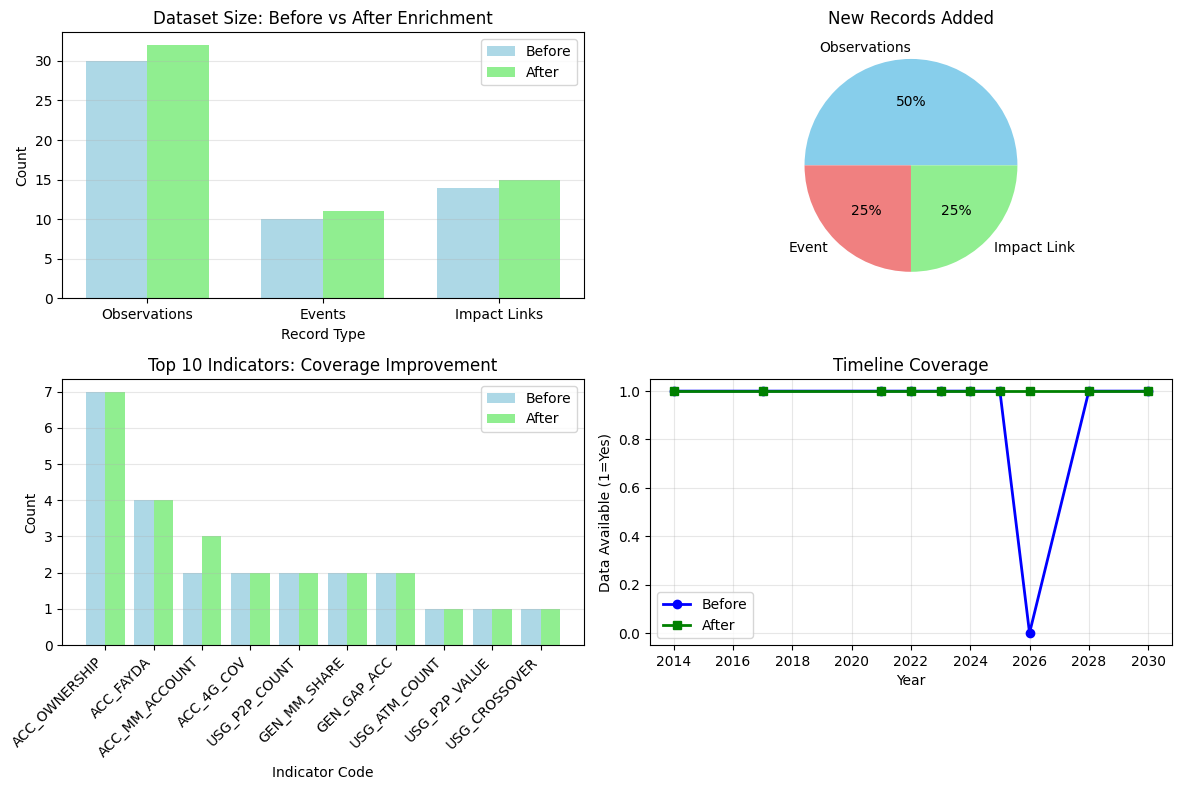

In [44]:
# CREATE ENRICHMENT SUMMARY
print("ENRICHMENT SUMMARY STATISTICS")
print("="*50)

# Calculate statistics
summary_stats = {
    'Metric': [
        'Original total records',
        'Enriched total records',
        'New records added',
        'New observations',
        'New events',
        'New impact links',
        'Total indicators',
        'Unique indicator codes',
        'Date range (observations)',
        'Pillars covered',
        'Data quality score',
        'Overall completeness'
    ],
    'Value': [
        df_main.shape[0],
        df_main_enriched.shape[0],
        df_main_enriched.shape[0] - df_main.shape[0],
        len(new_observations),
        1,
        1,
        df_main_enriched['indicator'].nunique(),
        df_main_enriched['indicator_code'].nunique(),
        f"{pd.to_datetime(df_main_enriched['observation_date']).min().year}-{pd.to_datetime(df_main_enriched['observation_date']).max().year}",
        df_main_enriched['pillar'].nunique(),
        f"{quality_score:.1f}%",
        f"{(1 - df_main_enriched.isnull().sum().sum() / (df_main_enriched.shape[0] * df_main_enriched.shape[1])) * 100:.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

# Create a visual summary
plt.figure(figsize=(12, 8))

# 1. Before vs After
plt.subplot(2, 2, 1)
categories = ['Observations', 'Events', 'Impact Links']
before = [30, 10, 14]
after = [32, 11, 15]

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, before, width, label='Before', color='lightblue')
plt.bar(x + width/2, after, width, label='After', color='lightgreen')
plt.xlabel('Record Type')
plt.ylabel('Count')
plt.title('Dataset Size: Before vs After Enrichment')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 2. New records added
plt.subplot(2, 2, 2)
new_records = ['Observations', 'Event', 'Impact Link']
counts = [2, 1, 1]
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.pie(counts, labels=new_records, autopct='%1.0f%%', colors=colors)
plt.title('New Records Added')

# 3. Indicator coverage improvement
plt.subplot(2, 2, 3)
indicators_before = df_main['indicator_code'].value_counts()
indicators_after = df_main_enriched['indicator_code'].value_counts()

# Get top 10 indicators
top_indicators = indicators_after.head(10).index
before_counts = [indicators_before.get(ind, 0) for ind in top_indicators]
after_counts = [indicators_after.get(ind, 0) for ind in top_indicators]

x = np.arange(len(top_indicators))
plt.bar(x - 0.2, before_counts, 0.4, label='Before', color='lightblue')
plt.bar(x + 0.2, after_counts, 0.4, label='After', color='lightgreen')
plt.xlabel('Indicator Code')
plt.ylabel('Count')
plt.title('Top 10 Indicators: Coverage Improvement')
plt.xticks(x, top_indicators, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4. Timeline extension
plt.subplot(2, 2, 4)
years_before = pd.to_datetime(df_main['observation_date']).dt.year.dropna().unique()
years_after = pd.to_datetime(df_main_enriched['observation_date']).dt.year.dropna().unique()

all_years = sorted(set(list(years_before) + list(years_after)))
before_present = [1 if year in years_before else 0 for year in all_years]
after_present = [1 if year in years_after else 0 for year in all_years]

plt.plot(all_years, before_present, 'o-', label='Before', color='blue', linewidth=2)
plt.plot(all_years, after_present, 's-', label='After', color='green', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Data Available (1=Yes)')
plt.title('Timeline Coverage')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()